# ITM 891 Project - Part 2
### Data Preprocessing

In [1]:
%matplotlib inline

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

Note: Please change filename directory before executing next cell

In [3]:
file = '/Users/syedkashif9786/Documents/Michigan State University/Large Scale Data Analysis/imdb_5000.csv'
imdb_df = pd.read_csv(file)
imdb_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
# Dropping unwanted columns and arranging new dataframe
to_keep = ['movie_title', 'imdb_score', 'title_year','language', 'duration', 'genres', 'movie_facebook_likes',
           'director_name', 'director_facebook_likes', 'actor_1_name', 'actor_2_name','cast_total_facebook_likes',
           'num_critic_for_reviews', 'num_user_for_reviews','content_rating', 'aspect_ratio', 'country', 'gross',
           'budget']

imdb = pd.DataFrame()
for col in to_keep:
    imdb[col] = imdb_df[col]
    
imdb.head()

,movie_title,imdb_score,title_year,language,duration,genres,movie_facebook_likes,director_name,director_facebook_likes,actor_1_name,actor_2_name,cast_total_facebook_likes,num_critic_for_reviews,num_user_for_reviews,content_rating,aspect_ratio,country,gross,budget
0,Avatar,7.9,2009.0,English,178.0,Action|Adventure|Fantasy|Sci-Fi,33000,James Cameron,0.0,CCH Pounder,Joel David Moore,4834,723.0,3054.0,PG-13,1.78,USA,760505847.0,237000000.0
1,Pirates of the Caribbean: At World's End,7.1,2007.0,English,169.0,Action|Adventure|Fantasy,0,Gore Verbinski,563.0,Johnny Depp,Orlando Bloom,48350,302.0,1238.0,PG-13,2.35,USA,309404152.0,300000000.0
2,Spectre,6.8,2015.0,English,148.0,Action|Adventure|Thriller,85000,Sam Mendes,0.0,Christoph Waltz,Rory Kinnear,11700,602.0,994.0,PG-13,2.35,UK,200074175.0,245000000.0
3,The Dark Knight Rises,8.5,2012.0,English,164.0,Action|Thriller,164000,Christopher Nolan,22000.0,Tom Hardy,Christian Bale,106759,813.0,2701.0,PG-13,2.35,USA,448130642.0,250000000.0
4,Star Wars: Episode VII - The Force Awakens ...,7.1,NaN,NaN,NaN,Documentary,0,Doug Walker,131.0,Doug Walker,Rob Walker,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dealing with missing values
Methodology:
* Dropped rows with missing values in gross and budget column. Since these are the most important features for my analysis, I am not imputing them
* Replaced missing values in categorical variable columns (language, content_rating, aspect_ratio) with mode (most frequent value)
* Replaced missing values in quantitative variable columns (num_critic_for_reviews, duration) with median value

In [5]:
# Checking missing values
imdb.isnull().sum()

movie_title                    0
imdb_score                     0
title_year                   108
language                      12
duration                      15
genres                         0
movie_facebook_likes           0
director_name                104
director_facebook_likes      104
actor_1_name                   7
actor_2_name                  13
cast_total_facebook_likes      0
num_critic_for_reviews        50
num_user_for_reviews          21
content_rating               303
aspect_ratio                 329
country                        5
gross                        884
budget                       492
dtype: int64

In [6]:
# Dropping rows with missing values in budget or gross column
imdb = imdb.dropna(subset = ['gross'], how = 'all')
imdb = imdb.dropna(subset = ['budget'], how = 'all')

In [7]:
# Since there aspect_ratio is nominal (non-ordinal), therefore I am converting it into categorical variable
imdb['aspect_ratio'] = imdb['aspect_ratio'].astype('str')
print(imdb.groupby('aspect_ratio')['aspect_ratio'].count())

aspect_ratio
1.18       1
1.33      19
1.37      50
1.5        1
1.66      40
1.75       2
1.77       1
1.78      41
1.85    1613
16.0       1
2.0        3
2.2       11
2.24       1
2.35    2014
2.39      11
2.4        3
2.55       1
2.76       3
nan       75
Name: aspect_ratio, dtype: int64


In [8]:
# Replacing missing values in language, content_rating, aspect_ratio with most frequent values
cols = ['language', 'content_rating', 'aspect_ratio']

for c in cols:
    imdb.loc[imdb[c].isnull(), c] = imdb[c].describe().top

/Users/syedkashif9786/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/syedkashif9786/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


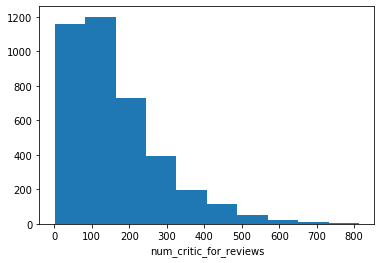

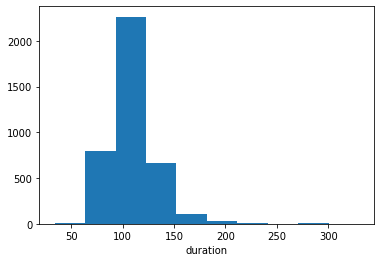

In [9]:
# Replacing missing values in num_critic_for_reviews, duration with median value
cols = ['num_critic_for_reviews', 'duration']
for c in cols:
    plt.hist(imdb[c])
    plt.xlabel(c)
    plt.show()
    imdb.loc[imdb[c].isnull(), c] = np.nanmedian(imdb[c])

In [10]:
# Checking missing values
imdb.isnull().sum()

movie_title                  0
imdb_score                   0
title_year                   0
language                     0
duration                     0
genres                       0
movie_facebook_likes         0
director_name                0
director_facebook_likes      0
actor_1_name                 3
actor_2_name                 5
cast_total_facebook_likes    0
num_critic_for_reviews       0
num_user_for_reviews         0
content_rating               0
aspect_ratio                 0
country                      0
gross                        0
budget                       0
dtype: int64

In [11]:
## Removing rows with missing values
imdb = imdb.dropna(subset = ['actor_1_name'], how = 'all')
imdb = imdb.dropna(subset = ['actor_2_name'], how = 'all')

### Dealing with outliers
* Removed outliers in gross and budget column
* Computed ROI as gross/budget and removed outliers in ROI column

count    3.886000e+03
mean     5.111905e+07
std      6.982446e+07
min      1.620000e+02
25%      6.852892e+06
50%      2.803840e+07
75%      6.548808e+07
max      7.605058e+08
Name: gross, dtype: float64

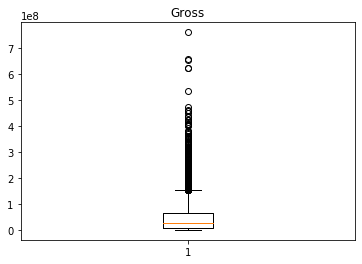

In [12]:
# Checking outliers in gross
plt.boxplot(imdb['gross'])
plt.title('Gross')
imdb['gross'].describe()

In [13]:
# Removing outliers in gross
imdb = imdb.loc[(imdb['gross'] < np.percentile(imdb['gross'], 95)) & (imdb['gross'] > np.percentile(imdb['gross'], 5)),]
imdb.shape[0]

3496

count    3.496000e+03
mean     4.260672e+07
std      2.329896e+08
min      2.180000e+02
25%      1.000000e+07
50%      2.400000e+07
75%      4.800000e+07
max      1.221550e+10
Name: budget, dtype: float64


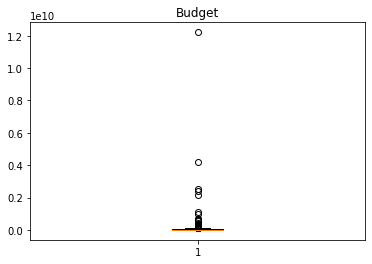

In [14]:
# Checking outliers in budget
plt.boxplot(imdb['budget'])
plt.title('Budget')
print(imdb['budget'].describe())

In [15]:
# Removing outliers in budget
imdb = imdb.loc[(imdb['budget'] < np.percentile(imdb['budget'], 95)) & (imdb['budget'] > np.percentile(imdb['budget'], 5)),]
imdb.shape[0]

3134

In [16]:
# Removing outliers in ROI
imdb['ROI'] = imdb['gross']/imdb['budget']
imdb = imdb.loc[(imdb['ROI'] < np.percentile(imdb['ROI'], 95)) & (imdb['ROI'] > np.percentile(imdb['ROI'], 5)),]
imdb.shape[0]

2820

In order to reduce the effect of economy, I have removed movied released before 2005

In [17]:
# Removing movies released before 2005 
imdb = imdb.loc[imdb['title_year'] >= 2005,]

Keeping English movies only

In [18]:
# Removing non-English movies
imdb = imdb.loc[imdb['language'] == 'English',]

### Transforming 'genres' column
Multiple genres are stored in the 'genres' column (Example: 'Drama|Romance'). This would cause difficulties future analysis.
To deal with this issue, I have identified popular genres and converted 'genres' column as dummy variable. Eg:

* Genres_________Action_________Crime_________Drama_________Romance_________Thriller
* 'Drama|Romance'_________0______________0_____________1______________1________________0

In [19]:
# Identifying popular genres
genre = list(imdb['genres'])
genre_list  = []
for g in genre:
    genre_list.append(g.split('|'))
    
flat_genre_list = [gnr for sublist in genre_list for gnr in sublist]

genre_dict = dict()
for fg in flat_genre_list:
    if fg in genre_dict.keys():
        genre_dict[fg] += 1
    else:
        genre_dict[fg] = 1
        
genre_dict

{'Drama': 690,
 'Romance': 307,
 'Comedy': 534,
 'Fantasy': 147,
 'Horror': 140,
 'Crime': 258,
 'Adventure': 177,
 'Animation': 64,
 'Family': 154,
 'Musical': 27,
 'Action': 277,
 'Sci-Fi': 131,
 'Thriller': 409,
 'Biography': 115,
 'History': 56,
 'Western': 14,
 'Sport': 65,
 'War': 41,
 'Mystery': 152,
 'Music': 62,
 'Documentary': 16,
 'Short': 1}

In [20]:
# Selecting genres with more than 250 occurences     
popular_genre = []
for key, value in genre_dict.items():
    if value > 250:
        popular_genre.append(key)

In [21]:
# Adding popular genres as individual columns 
popular_genre = sorted(popular_genre)

for pg in popular_genre:
    imdb[pg] = 0

for index, row in imdb.iterrows():
    movie_genre = imdb.loc[index, 'genres']
    for pg in popular_genre:
        if pg in movie_genre:
            imdb.loc[index, pg] = 1
            
imdb.head()

,movie_title,imdb_score,title_year,language,duration,genres,movie_facebook_likes,director_name,director_facebook_likes,actor_1_name,...,country,gross,budget,ROI,Action,Comedy,Crime,Drama,Romance,Thriller
50,The Great Gatsby,7.3,2013.0,English,143.0,Drama|Romance,115000,Baz Luhrmann,1000.0,Leonardo DiCaprio,...,Australia,144812796.0,105000000.0,1.379169,0,0,0,1,1,0
134,Dark Shadows,6.2,2012.0,English,113.0,Comedy|Fantasy|Horror,82000,Tim Burton,13000.0,Johnny Depp,...,USA,79711678.0,100000000.0,0.797117,0,1,0,0,0,0
157,Fun with Dick and Jane,6.1,2005.0,English,90.0,Comedy|Crime,2000,Dean Parisot,23.0,John Michael Higgins,...,USA,110332737.0,100000000.0,1.103327,0,1,1,0,0,0
209,Rio 2,6.4,2014.0,English,101.0,Adventure|Animation|Comedy|Family|Musical,0,Carlos Saldanha,107.0,Miguel Ferrer,...,USA,131536019.0,103000000.0,1.277049,0,1,0,0,0,0
231,RoboCop,6.2,2014.0,English,117.0,Action|Crime|Sci-Fi|Thriller,60000,José Padilha,294.0,Gary Oldman,...,USA,58607007.0,100000000.0,0.586070,1,0,1,0,0,1


In [22]:
imdb.columns

Index(['movie_title', 'imdb_score', 'title_year', 'language', 'duration',
       'genres', 'movie_facebook_likes', 'director_name',
       'director_facebook_likes', 'actor_1_name', 'actor_2_name',
       'cast_total_facebook_likes', 'num_critic_for_reviews',
       'num_user_for_reviews', 'content_rating', 'aspect_ratio', 'country',
       'gross', 'budget', 'ROI', 'Action', 'Comedy', 'Crime', 'Drama',
       'Romance', 'Thriller'],
      dtype='object')

In [23]:
# Renaming, rearranging and dropping columns
imdb = imdb.rename(columns = {'director_facebook_likes': 'Dir_FB_likes', 
                              'cast_total_facebook_likes': 'Cast_FB_likes'})

imdb = imdb[['movie_title', 'imdb_score', 'title_year', 'duration', 'movie_facebook_likes', 'director_name',
             'Dir_FB_likes', 'actor_1_name', 'actor_2_name','Cast_FB_likes','num_critic_for_reviews', 
             'num_user_for_reviews', 'content_rating', 'aspect_ratio', 'country', 'Action', 'Comedy', 
             'Crime', 'Drama','Romance', 'Thriller', 'gross', 'budget', 'ROI']]

imdb.head()

,movie_title,imdb_score,title_year,duration,movie_facebook_likes,director_name,Dir_FB_likes,actor_1_name,actor_2_name,Cast_FB_likes,...,country,Action,Comedy,Crime,Drama,Romance,Thriller,gross,budget,ROI
50,The Great Gatsby,7.3,2013.0,143.0,115000,Baz Luhrmann,1000.0,Leonardo DiCaprio,Elizabeth Debicki,29770,...,Australia,0,0,0,1,1,0,144812796.0,105000000.0,1.379169
134,Dark Shadows,6.2,2012.0,113.0,82000,Tim Burton,13000.0,Johnny Depp,Chloë Grace Moretz,80849,...,USA,0,1,0,0,0,0,79711678.0,100000000.0,0.797117
157,Fun with Dick and Jane,6.1,2005.0,90.0,2000,Dean Parisot,23.0,John Michael Higgins,Richard Burgi,1997,...,USA,0,1,1,0,0,0,110332737.0,100000000.0,1.103327
209,Rio 2,6.4,2014.0,101.0,0,Carlos Saldanha,107.0,Miguel Ferrer,Rachel Crow,1031,...,USA,0,1,0,0,0,0,131536019.0,103000000.0,1.277049
231,RoboCop,6.2,2014.0,117.0,60000,José Padilha,294.0,Gary Oldman,Abbie Cornish,14161,...,USA,1,0,1,0,0,1,58607007.0,100000000.0,0.586070


Note: Please change filename directory before executing next cell

In [24]:
# Saving file
imdb.to_csv('/Users/syedkashif9786/Documents/Michigan State University/Large Scale Data Analysis/Imdb_processed.csv',\
            index = False)